In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

What are the factor influenced a candidate in getting placed and their salary?

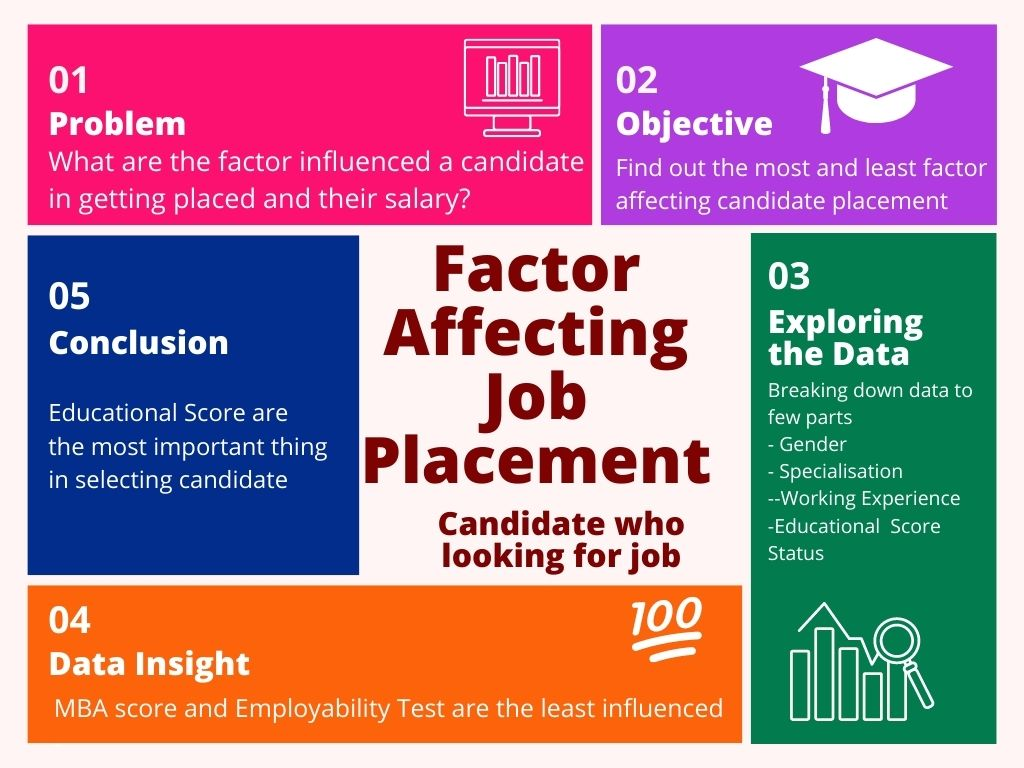

### Extracting and Examining Dataset

In [3]:
placement = pd.read_csv("Placement_Data_Full_Class.csv")
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


We have Gender, Specialisation and Working Experience.

We have all the Educational Performance(Score) data

We have the Status of Placement and Salary details

In [5]:
placement.shape

(215, 15)

### Checking and Handling for missing data

In [6]:
placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

There are 67 null values in the salary column because they are still not working.

So the best to deal with this problem is to replace it with 0.


In [7]:
placement['salary'].fillna(value=0 , inplace = True )
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
placement.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Dropping Less Valuable Column

In [9]:
placement.drop(['sl_no','ssc_b','hsc_b'], axis = 1 , inplace = True)


In [10]:
placement.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [11]:
placement.shape

(215, 12)

Now the data looks good to be explored!

# Data Visualization

### 1) Count of categorical features - Count plot

We gonna see the categorical value from the data first such as Gender, Specialisation in High School/Degree/MBA, Working Experience and also the Placement Status

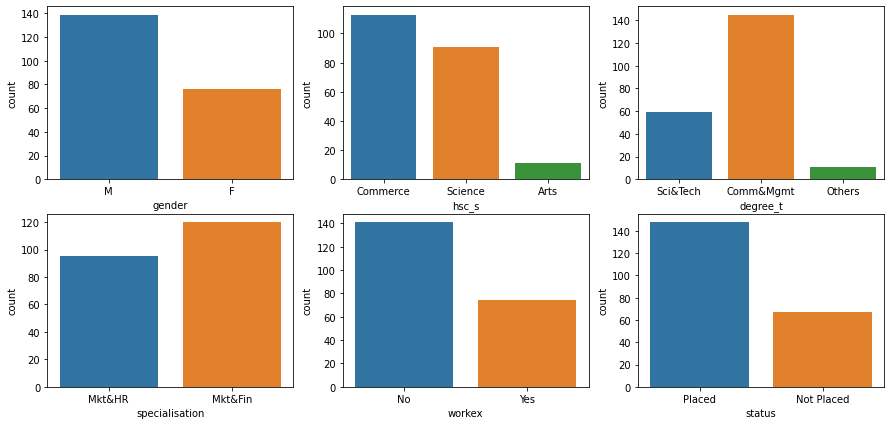

In [12]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = placement)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = placement)

plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = placement)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = placement)

plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = placement)

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = placement)

Gender: Male > Female

Specialisation High: Commence > Science > Arts

Specialisation Degree: Comm&Mgmt > Sci&Tech > Others

Specialisation MBA: Mkt&Fin > Mkt&HR

Working Experience: No > Yes

Status: Placed > Not Placed

### 2) Correlation between Academic percentages and Placement (Salary) - Heatmap

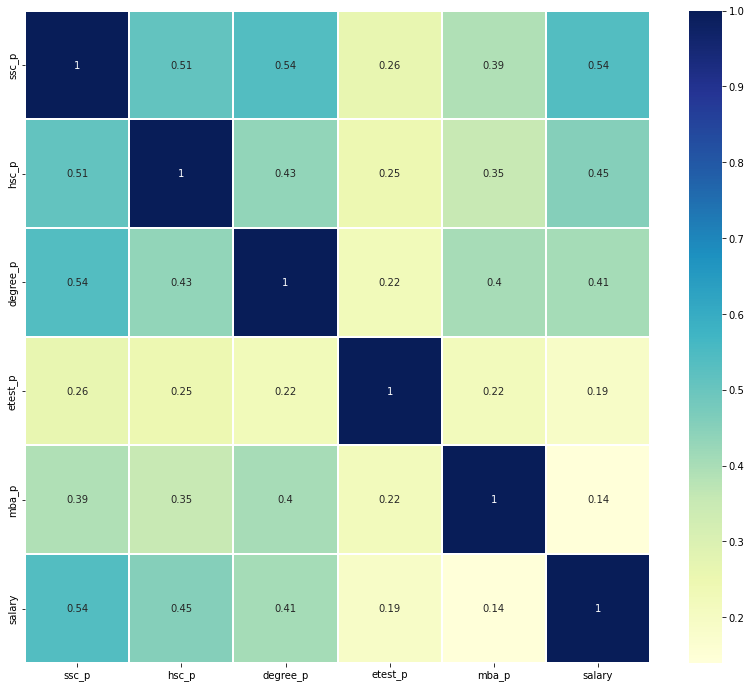

In [13]:
plt.figure(figsize=(14,12))
sns.heatmap(placement.corr(), linewidth=0.2, cmap="YlGnBu", annot=True)
plt.show()

MBA percentage and etest percentage(Employability Test) are the least significant variable that affect the placement outcomes which is 0.14 and 0.19 significantly.

This means from the data, employee doesnt really care about the candidate score in MBA and also employability score. But is really true? Lets try go deeper.

### 3) Does percentage matters for one to get placed? - Scatter Plot

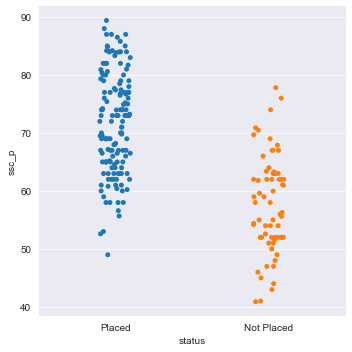

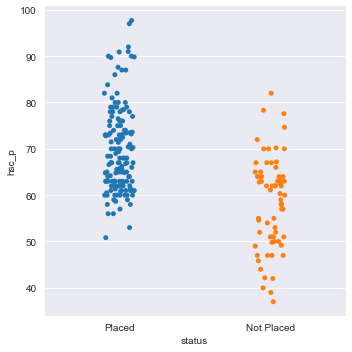

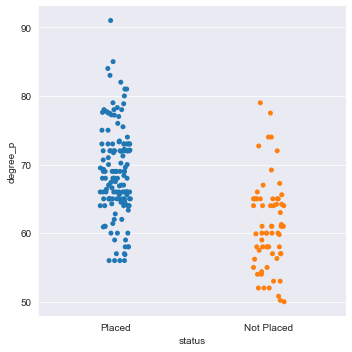

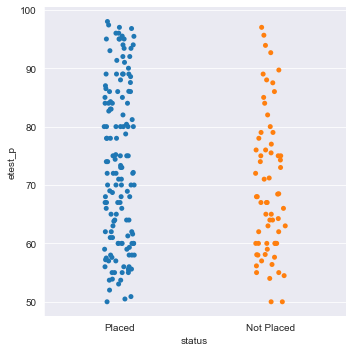

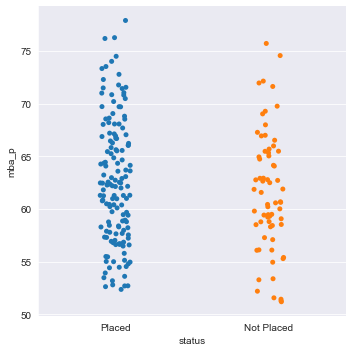

In [14]:
sns.set_style('darkgrid')
sns.catplot(x="status", y="ssc_p", data=placement,)
sns.catplot(x="status", y="hsc_p", data=placement)
sns.catplot(x="status", y="degree_p", data=placement)
sns.catplot(x="status", y="etest_p", data=placement)
sns.catplot(x="status", y="mba_p", data=placement)


plt.show()

By above graph we can say good percentage is required minimum 60% to 80% for geting placement. 

But here we observed MBA percentage and employabilty score doesnt really show so much different between the placed candidate and also not placed.

### 4) MBA marks vs Placement Status- Does your academic score influence?

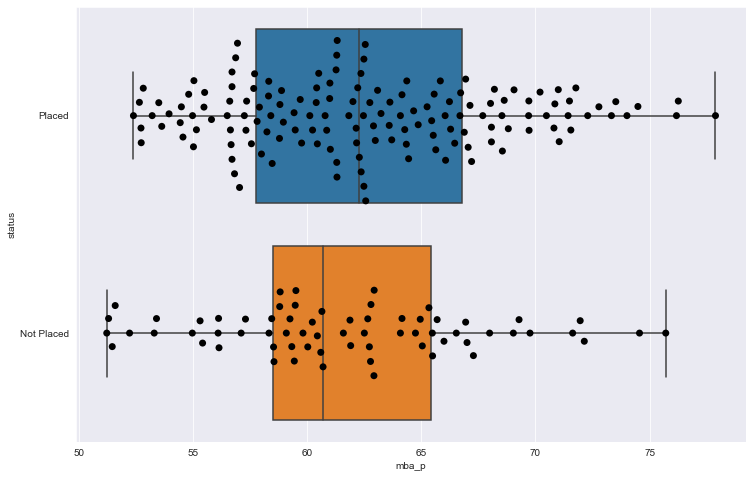

In [15]:

g = sns.boxplot(y = "status",x = 'mba_p',data = placement)
g = sns.swarmplot(y = "status",x = 'mba_p',data = placement, size = 7,color = 'black')
g.figure.set_size_inches(12,8)
plt.show()

Comparitively there's a slight difference between the percentage scores between both the groups, But still placed candidates still has an upper hand when it comes to numbers as you can see in the swarm. 

So as per the plot,percentage do influence the placement status

### 5) Does MBA percentage and Employability score correlate?

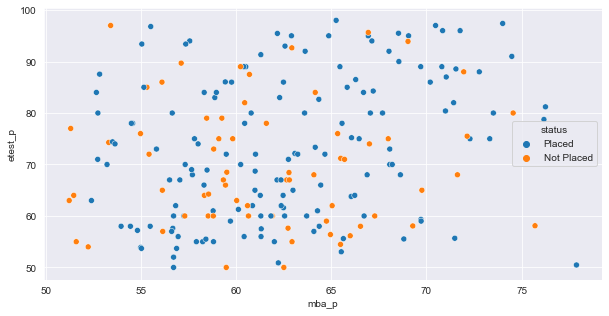

In [16]:


fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data = placement, 
                     x='mba_p', y='etest_p', 
                     hue='status', alpha = 1)
plt.show()

#There is no relation between mba percentage and employability test
#There are many candidates who haven't got placed when they don't have work experience
#Most of the candidates who performed better in both tests have got placed

There is no relation between mba percentage and employability test

There are many candidates who haven't got placed when they don't have work experience

Most of the candidates who performed better in both tests have got placed

### 6) Work experience Vs Placement Status - Pie and Bar Chart

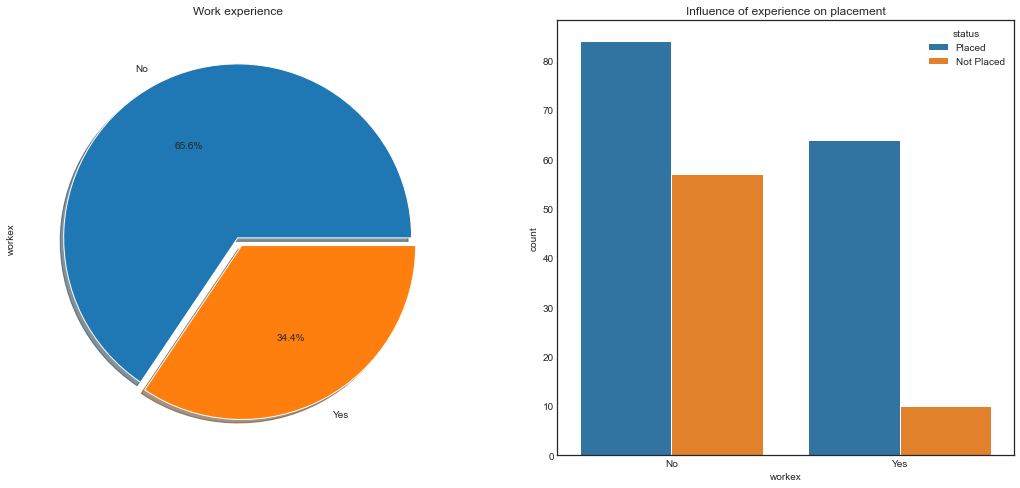

In [17]:


plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement)
ax[1].set_title('Influence of experience on placement')
plt.show()

We have nearly 66% of candidates who never had any work experience

Candidates who never had work experience have got hired more than the ones who had experience

We can conclude that work experience doesn't influence a candidate in the recruitment process


### 7) Gender Vs Placement Status - Pie and Bar Chart

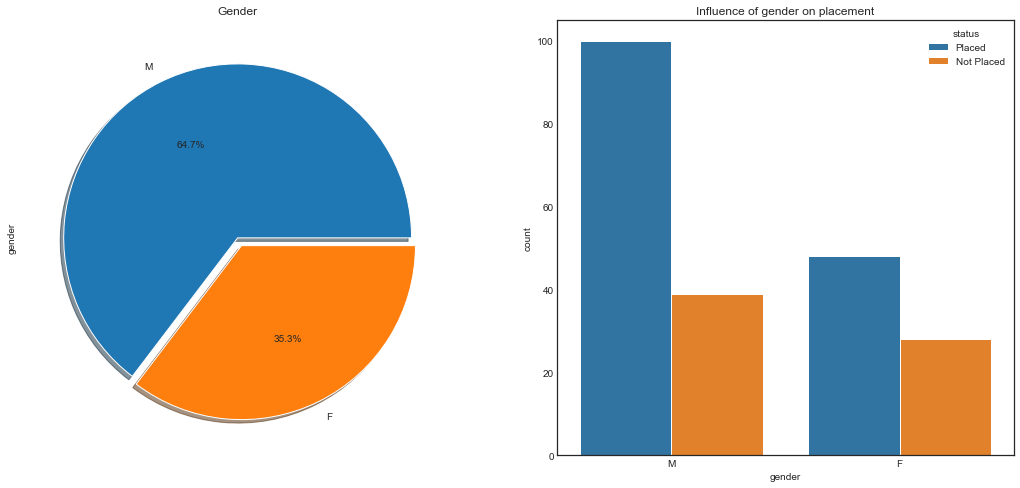

In [18]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement['gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
sns.countplot(x = 'gender',hue = "status",data = placement)
ax[1].set_title('Influence of gender on placement')
plt.show()

### 7) Is there any gender bias while offering remuneration?

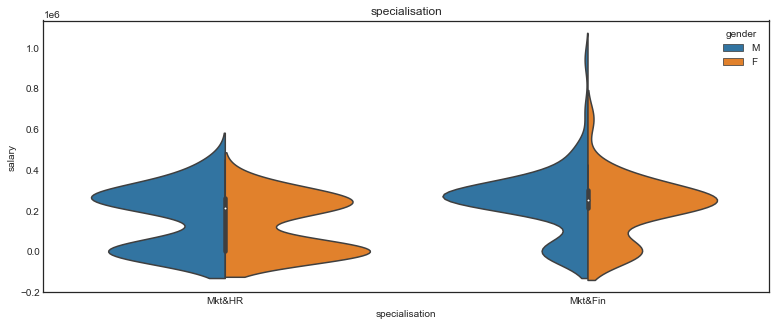

In [19]:
fig, ax = plt.subplots(figsize=(13,5))
ax = sns.violinplot(data = placement, 
                 x = 'specialisation', 
                 y='salary', 
                 hue='gender', split=True)
ax.set_title("specialisation")
plt.show()


The top salaries were given to male

The average salary offered were also higher for male

More male candidates were placed compared to female candidates

### 8) Is gender affects the employability?

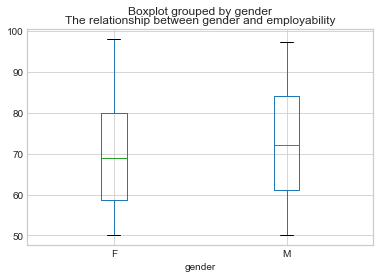

In [34]:
gender_employability = placement.boxplot(by ='gender', column =['etest_p'], grid = True)
gender_employability.plot()
plt.title("The relationship between gender and employability")
plt.show()

Apparently, the male have higher employability than female in general.

### Distribution of our data

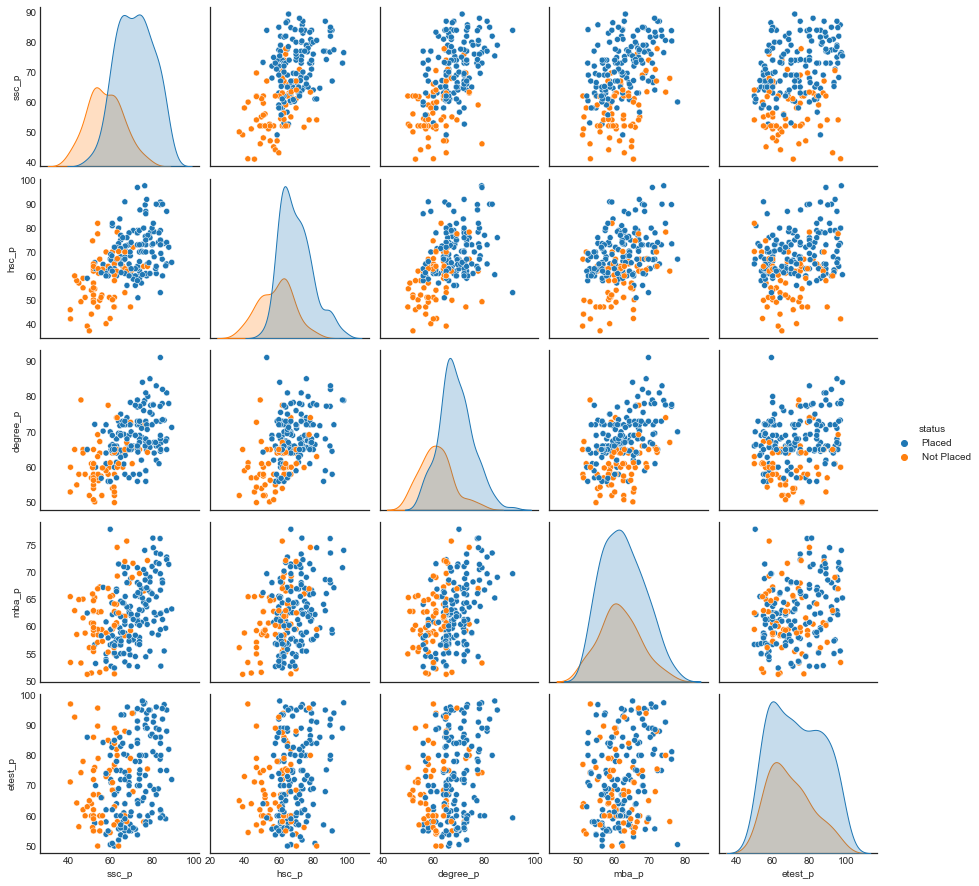

In [20]:


sns.pairplot(placement,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")


Candidates who has high score in higher secondary and undergrad got placed

Whomever got high scores in their schools got placed

Comparing the number of students who got placed candidates who got good mba percentage and employability percentage

# Conclusion

In [35]:
#
#Educational percentages are highly influential for a candidate to get placed
#Past work experience doesn't influence much on your masters final placements
#There are no gender discrimination while hiring, but higher packages were given to male given that male have higher employability than female in general.
#Academic percentages have no relation towards salary package.